In [1]:
import findspark

In [2]:
from pyspark.ml.stat import Correlation
from pyspark.ml.stat import ChiSquareTest
from pyspark.ml.feature import VectorAssembler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from functools import partial
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, RBF, RationalQuadratic, ExpSineSquared
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator, TransformerMixin
from functools import partial
from sklearn.model_selection import GridSearchCV
from IPython.display import display
import pyspark;
import os
import sys
import pandas as pd


In [3]:
import time
import warnings
pd.options.display.max_colwidth = 200
warnings.filterwarnings(action='ignore')

from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import math
from IPython.core.interactiveshell import InteractiveShell
from datetime import *
import statistics as stats
from pyspark.rdd import RDD
from pyspark.sql import Row
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions
from pyspark.sql.functions import lit, desc, col, size, array_contains\
, isnan, udf, hour, array_min, array_max, countDistinct
from pyspark.sql.types import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator, TransformerMixin
from functools import partial
from sklearn.model_selection import GridSearchCV

Spark works on RDD(Resilient Distributed Datasets) which are built to work with parallel computing not like pandas dataframe.

In [39]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler



In [8]:
import pandas as pd
data = pd.read_csv('kidney_disease.csv')

In [9]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [10]:
print('Columns overview')
data.dtypes

Columns overview


id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [11]:
print('Data overview')
data.describe()

Data overview


,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [40]:
df=data.copy()
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
df[['appet']] = df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
df['classification'] = df['classification'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})
df.rename(columns={'classification':'class'},inplace=True)

In [41]:
df['pe'] = df['pe'].replace(to_replace='good',value=0) # Not having pedal edema is good
df['appet'] = df['appet'].replace(to_replace='no',value=0)
df['cad'] = df['cad'].replace(to_replace='\tno',value=0)
df['dm'] = df['dm'].replace(to_replace={'\tno':0,'\tyes':1,' yes':1, '':np.nan})
df.drop('id',axis=1,inplace=True)

In [42]:
df2 = df.dropna(axis=0)
df2['class'].value_counts()

0.0    115
1.0     43
Name: class, dtype: int64

In [43]:
# Describe columns not taken into consideration in cell above, we will deal with categorical data after cleaning the data
train_data[[c for c in train_data.columns if c not in train_data.describe().columns]].astype('category').describe()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
count,300,300,300,300,300,300,300,300,300,300,300
unique,2,2,2,2,2,2,2,2,2,2,2
top,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
freq,272,250,271,290,191,202,278,245,248,255,177


In [44]:
train_data['cad'].unique()

array(['no', 'yes'], dtype=object)

In [45]:
def removeNonAlphanumeric(df) :
    """ 
    Remove non-alphanumeric characters from data values
    Input :
        df -- dataframe 
    Output :
        df -- cleaned dataframe
    """
    for c in df.columns :
        if df[c].dtype == "O" :
            df[c] = df[c].str.replace('\t', '')
            df[c] = df[c].str.replace('[^a-zA-Z0-9]', '')
    df = df.replace('',np.nan)
    return df

def toNumeric(df):
    """" 
    Convert string column corresponding to numerical values to numerical columns
    Input : 
        df -- dataframe 
    Output :
        df -- dataframe with converted columns
    """
    for c in df.columns :
        if df[c].dtype == "O" and all(df[c].str.isnumeric()):
            df[c] = pd.to_numeric(df[c])
    return df
            


class HandleMissingTransformer(BaseEstimator, TransformerMixin):
    """Customized transformer to handles missing data"""
    
    def __init__(self, method,constant = ''):
        '''' 
        Initialise The transformer
        Inputs :
            method -- method used to replace or impute missing data (drop/constant/most_frequent/median/mean)
            constant -- if constant method is selected, the value of the constant must be specified
        '''
        self.method = method
        self.constant = constant
        self.imputerDict = {}
        

    def fit(self, df ):
        '''
        If impute method is selected i.e self.method not in ['drop', 'constant'], we must fit an imputer
        Input : 
            df -- data with missing
        '''
        if self.method not in ['drop', 'constant'] :
            if self.method != "most_frequent":
                print("For non numerical columns, most frequent strategy is used")
            for c in df.columns :
                imp = SimpleImputer(missing_values=np.nan, strategy=self.method if df[c].dtype!="O" else "most_frequent")
                imp = imp.fit(df[[c]])
                self.imputerDict[c] = imp 
        return self
            
                
        
    def transform(self, df):
        """
        If impute method is selected, impute missing values using imput_dict created in fit function
        Input : 
            df -- data with missing values
        """
        if self.method == "drop" :
            df = df.dropna(inplace= True)
        elif self.method == 'constant' :
            df.fillna(self.constant, inplace= True)
        else :
            for c in df.columns : 
                df[c] = self.imputerDict[c].transform(df[[c]])
        return df  
    
def getCategFeat(df, n, target):
    """
    get dataframe's categorical features 
    Inputs :
        df     -- dataframe  
        n      -- min modalities for numerical features
        target -- target column name
    """
    return [c for c in df.columns if (df[c].dtype == 'O' or df[c].nunique()<n) and c!=target]

In [46]:
# Remove non alphanumeric 
transf_alphaN = FunctionTransformer(removeNonAlphanumeric, validate= False) 
# Transform function to Transformer object so that we can use in pipeline at test time
transf_num = FunctionTransformer(toNumeric, validate= False)
train_data = transf_alphaN.transform(train_data)
train_data = transf_num.transform(train_data)

In [47]:
print("Columns with null values before imputing")
print(train_data.columns[train_data.isna().any()].tolist())

# Handle missing values
transf_Missing = HandleMissingTransformer(method="most_frequent")
train_data = transf_Missing.fit(train_data).transform(train_data)

print("Columns with null values after imputing")
print(train_data.columns[train_data.isna().any()].tolist())

Columns with null values before imputing
[]
Columns with null values after imputing
[]


In [48]:
train_data['cad'].unique()

array(['no', 'yes'], dtype=object)

In [49]:
minModalities = 7 ## To match dataset desciprtion on UCI website, numerical variables with less than 7 modalities are considered as nominal
categorical_features = getCategFeat(train_data,minModalities,'classification')
print("Categorical Features : ",categorical_features)
numerical_features = [c for c in train_data.columns if c not in categorical_features and c!="classification"]
print("Numerical Features : ", numerical_features)

Categorical Features :  ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
Numerical Features :  ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']


In [50]:
def target_variable_exploration(df, target, xlabel, ylabel, title, positive=1) :
    """ 
    plots the distribution of the classes
    Input :
        df -- dataframe containing classes
        target -- class column
        xlabel
        ylabel 
        title
        positive -- modality corresponding to positive class
    """
    negative =  [c for c in df[target].unique() if c !=positive][0]
    positive_class = df[target].value_counts()[positive]
    negative_class = df[target].shape[0] - positive_class
    positive_per = positive_class / df.shape[0] * 100
    negative_per = negative_class / df.shape[0] * 100
    plt.figure(figsize=(8, 8))
    sns.countplot(df[target], order=[positive, negative]);
    plt.xlabel(xlabel, size=15, labelpad=15)
    plt.ylabel(ylabel, size=15, labelpad=15)
    plt.xticks((0, 1), [ 'Positive class ({0:.2f}%)'.format(positive_per), 'Negative class ({0:.2f}%)'.format(negative_per)])
    plt.tick_params(axis='x', labelsize=13)
    plt.tick_params(axis='y', labelsize=13)
    plt.title(title, size=15, y=1.05)
    plt.show()

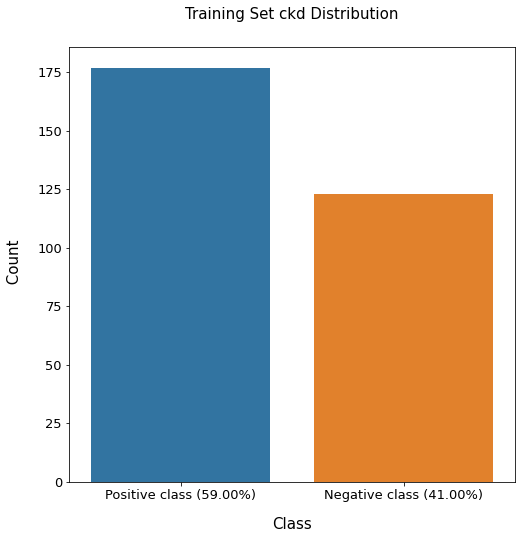

In [51]:

target_variable_exploration(train_data, "classification", 'Class', ' Count', 'Training Set ckd Distribution', positive = 'ckd')

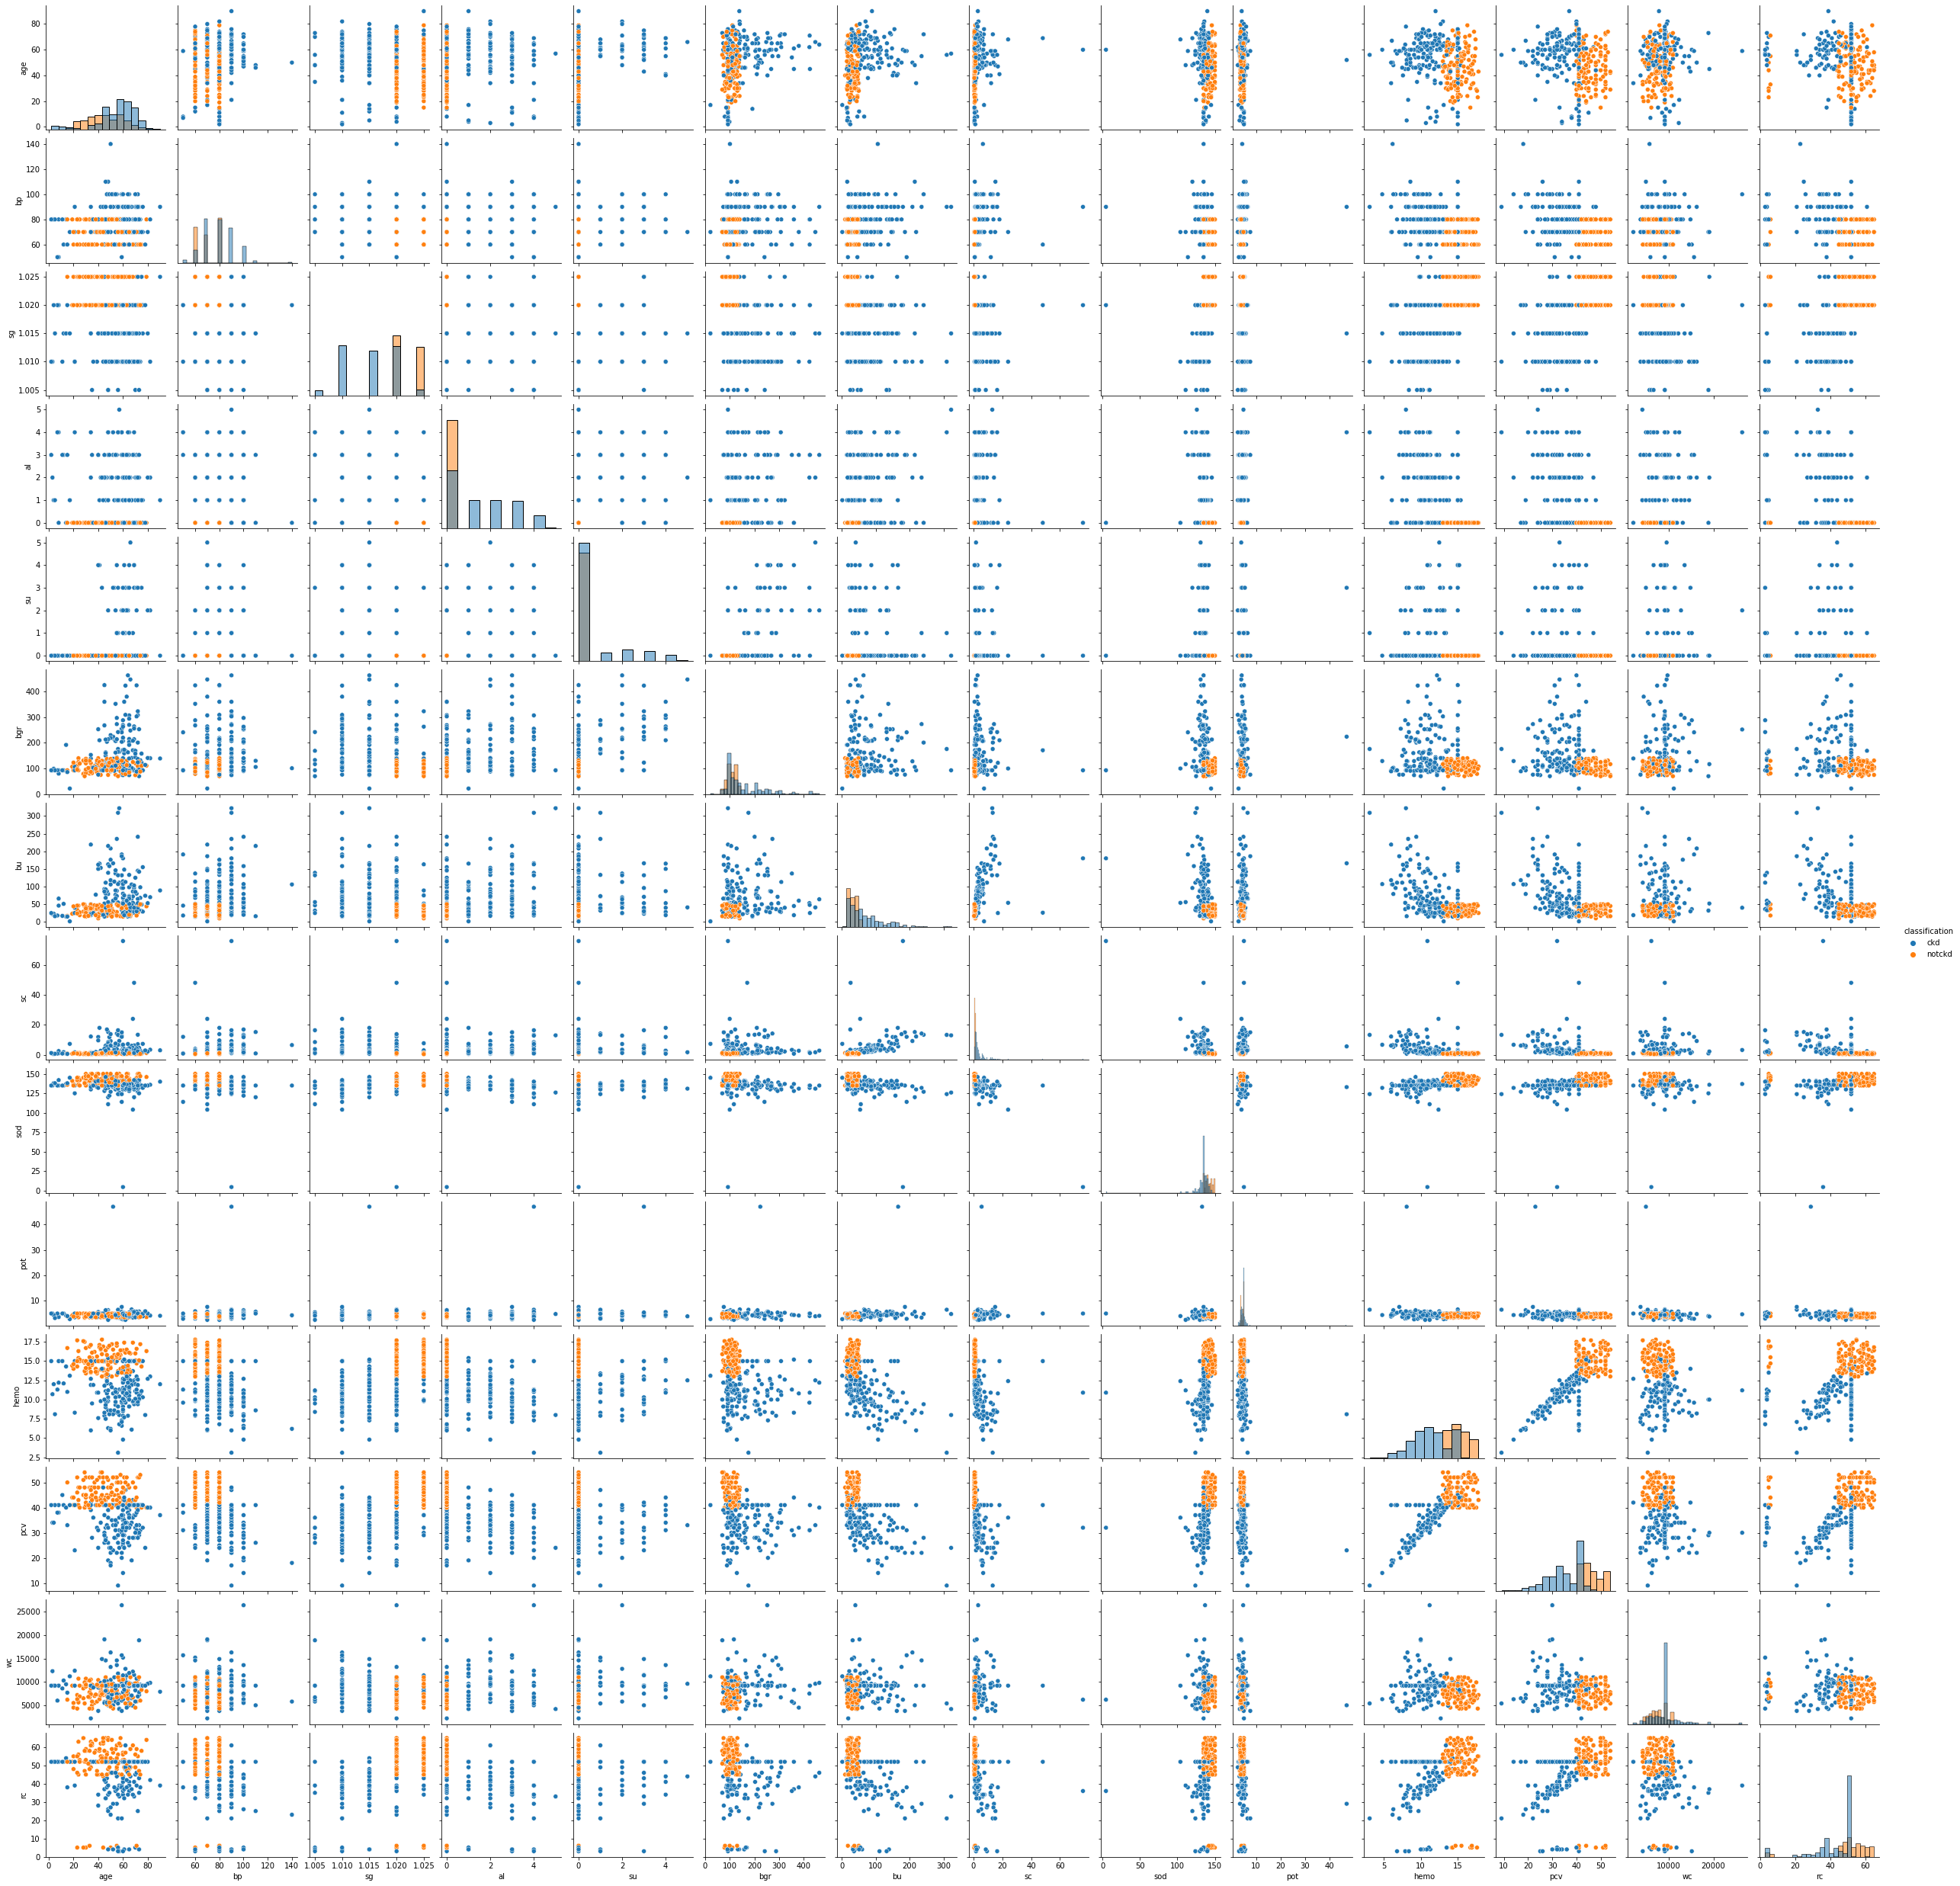

In [52]:
# Pairplots
sns.pairplot(train_data, diag_kind ='hist' , hue="classification")
plt.show()

- For variables "RC", "pvc", "hemo", "sod", bigger values corresponds to higher probability of "nonckd" ;
- The histograms of the numerical features show that there are numerical variables present in the dataset that consists of few discrete values, e.g. "sg". Those features are considered as nominal (As stated in data description on the website UCI); 
- Some modalities of categorical features (eg. "ba") exist only among individuals with ckd ;
- There are some categorical features, where the different categories occur with similar frequency, e.g. for "sg"; and there are feature, where one category is very dominant, e.g. for "su" ;
- Some features show a linear relationship with each other, for example "hema" and "pcv". We will study later correlation relationships between variables.

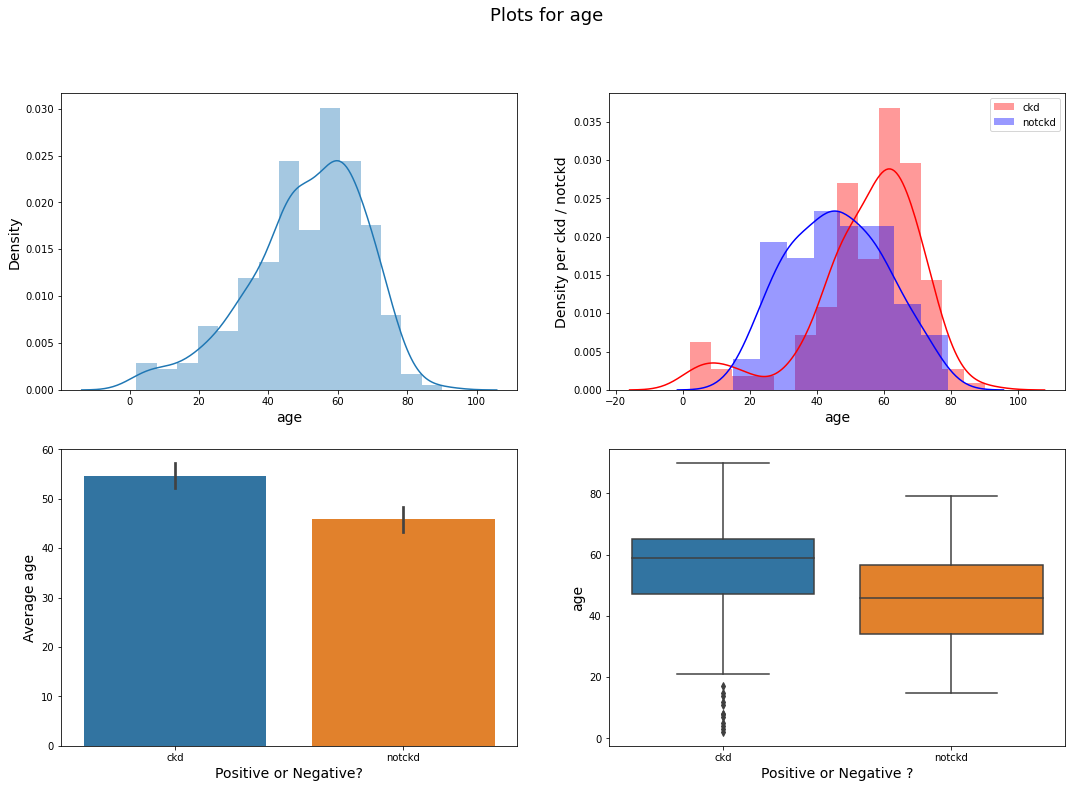

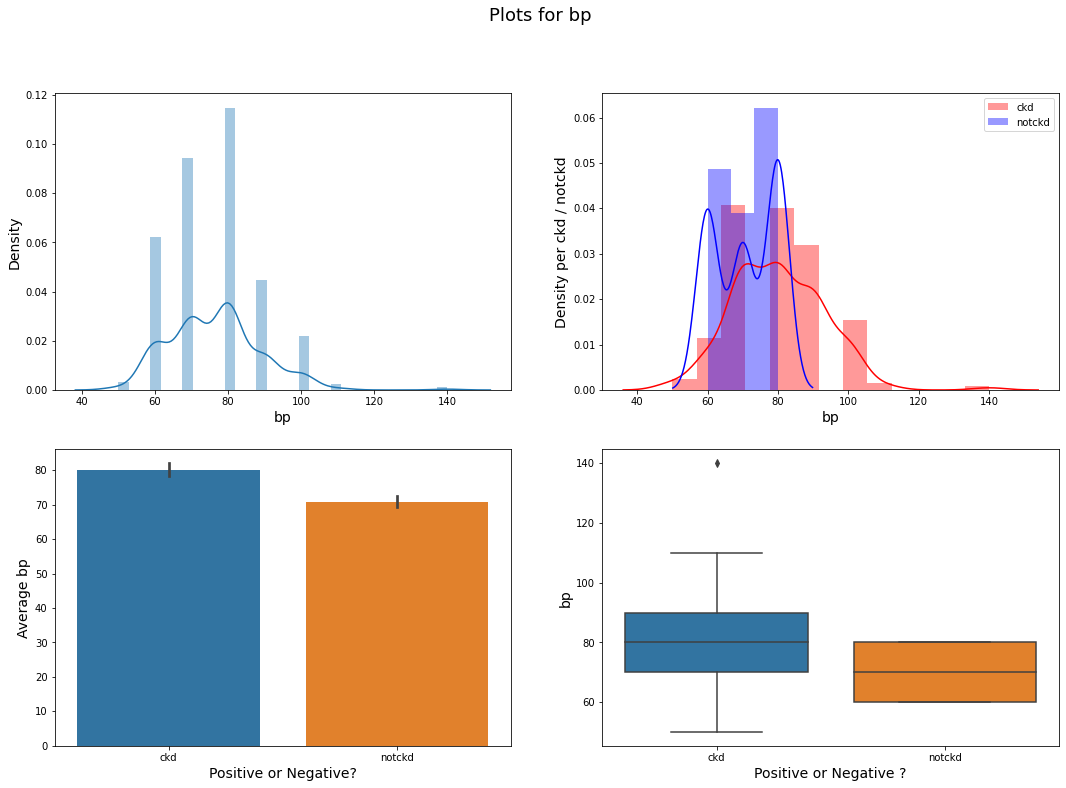

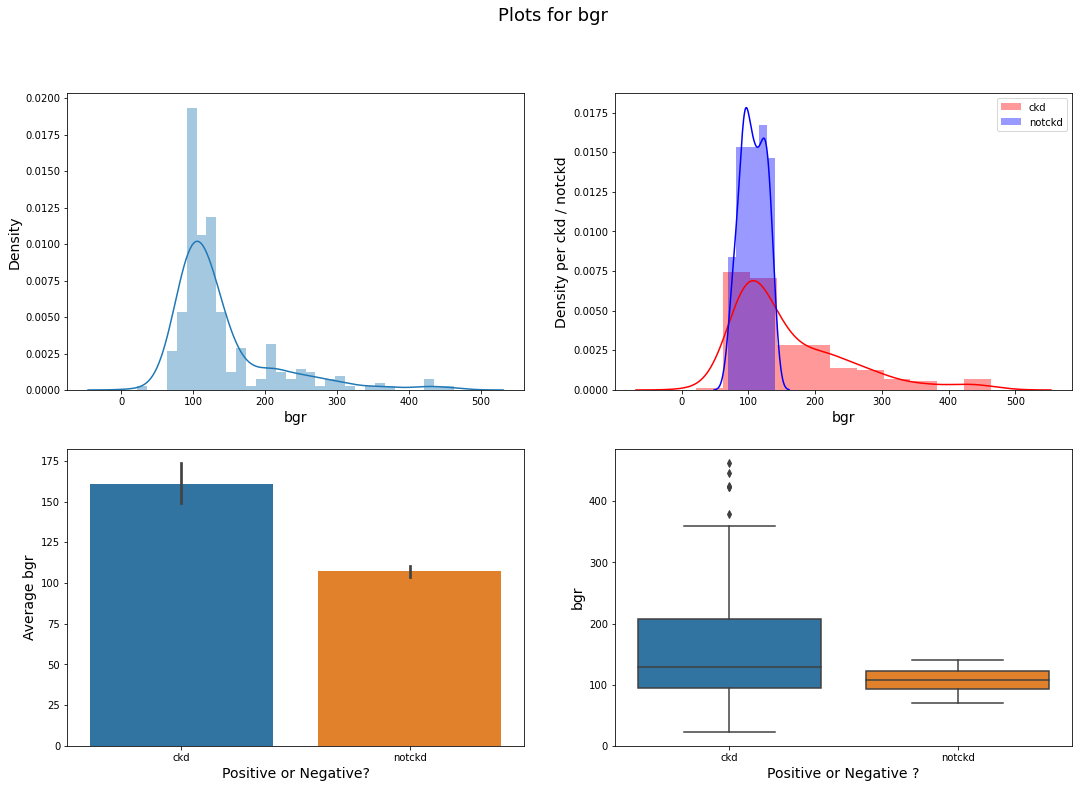

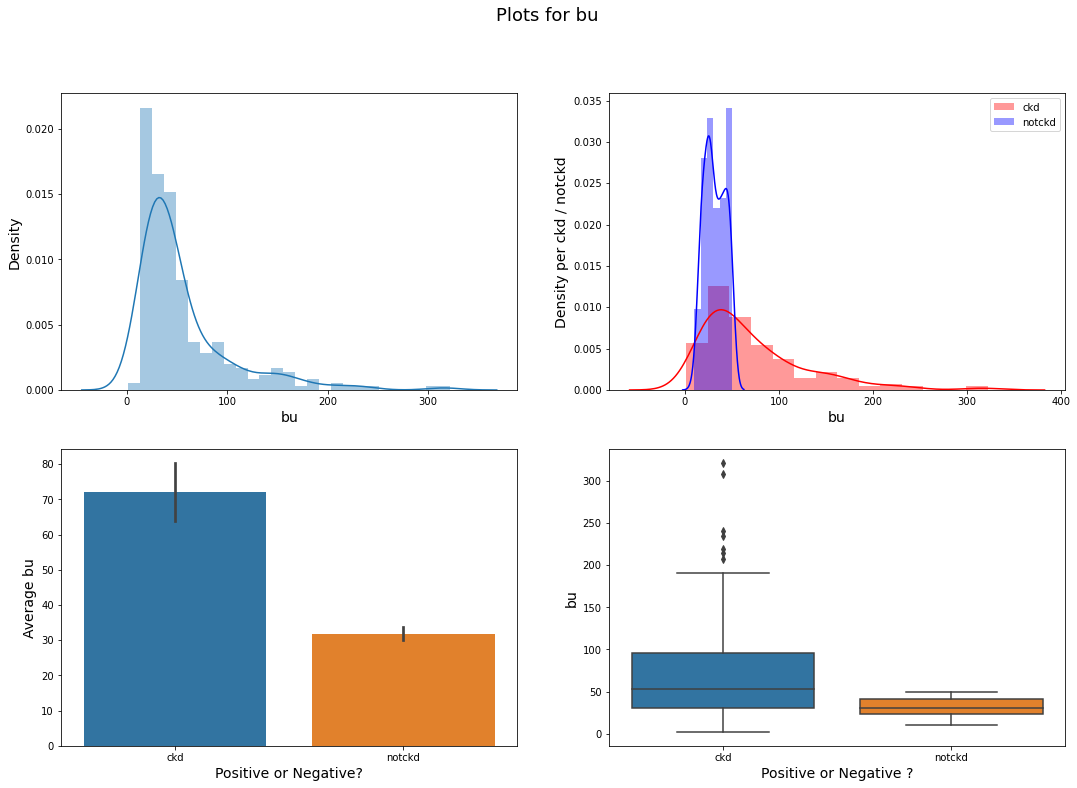

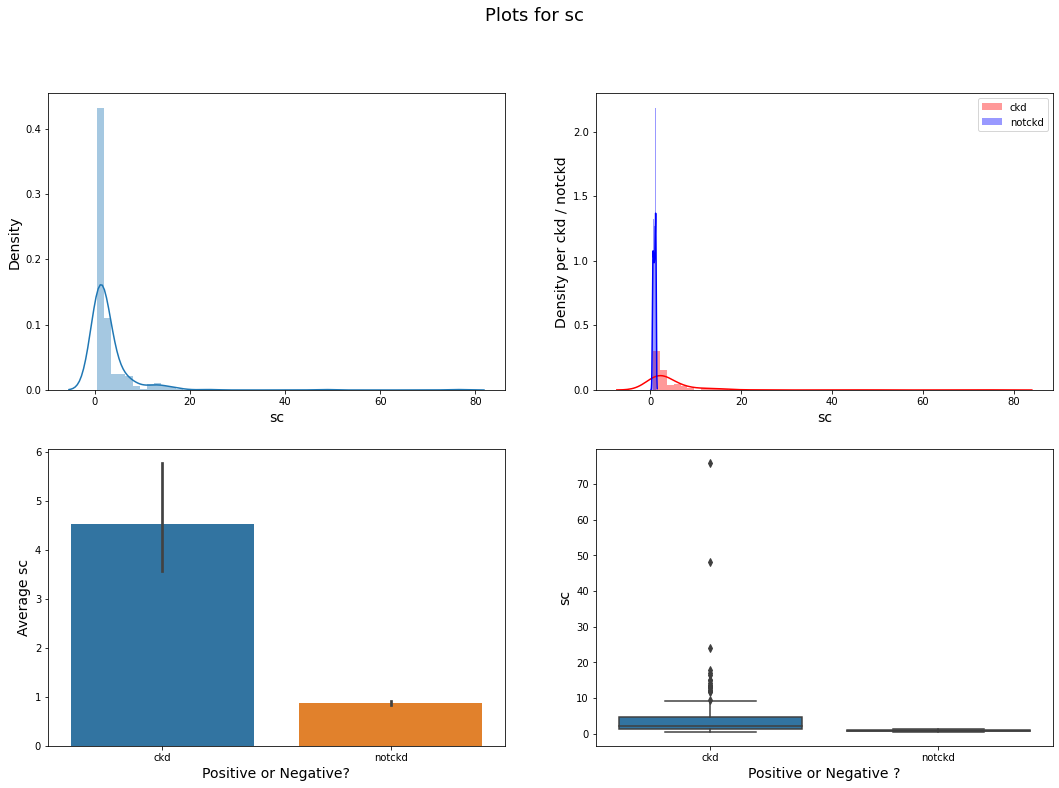

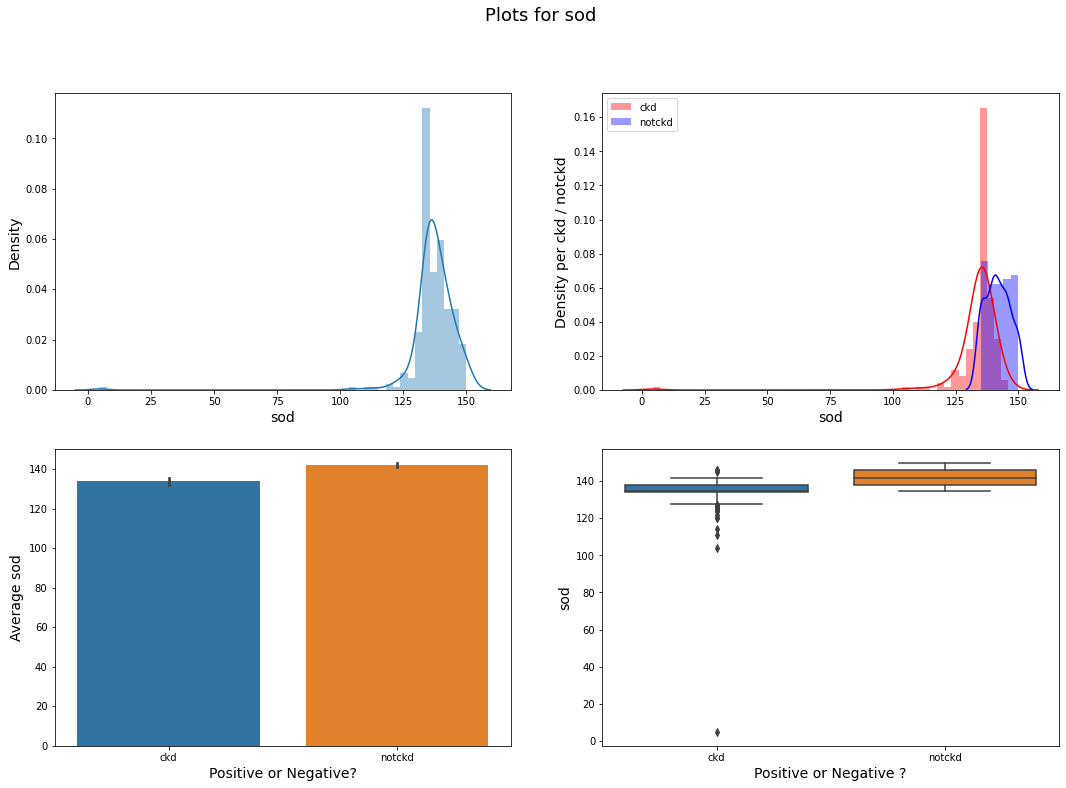

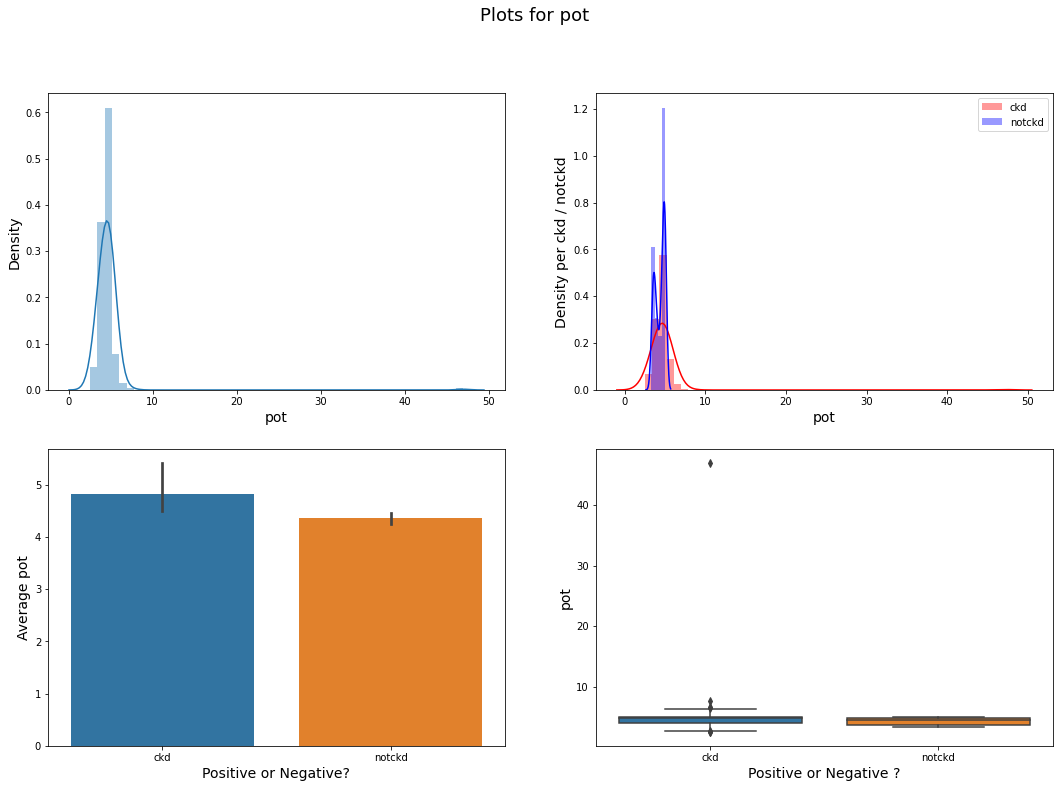

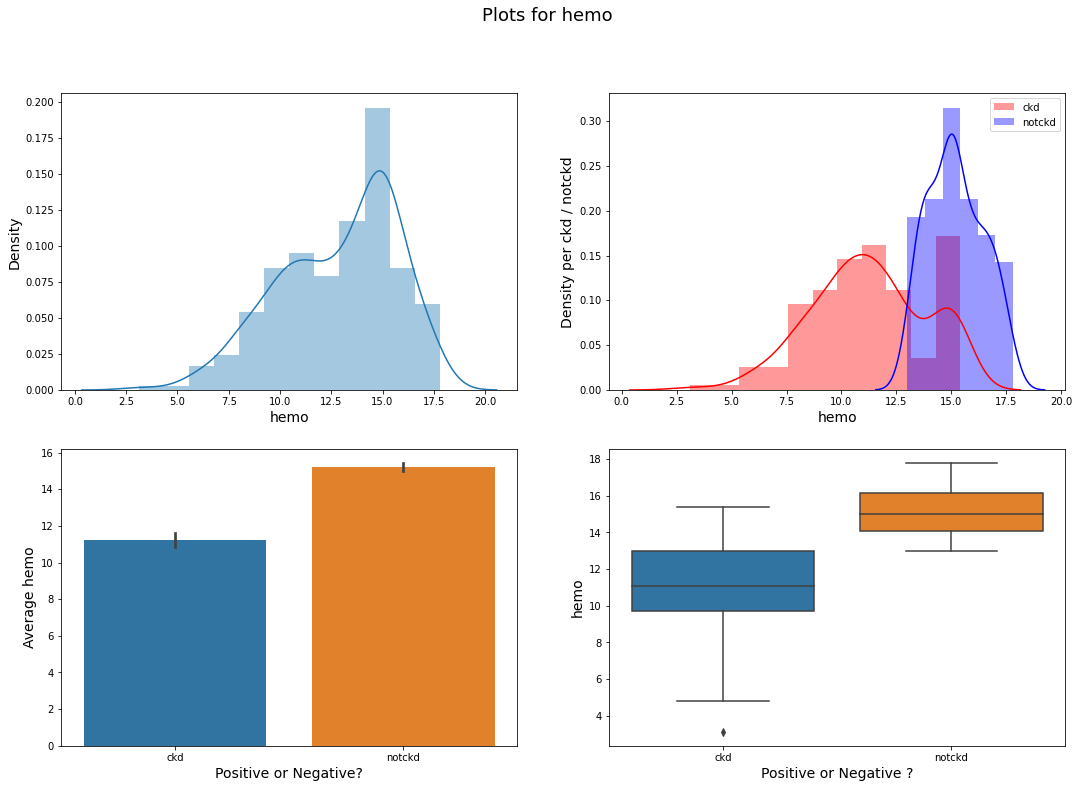

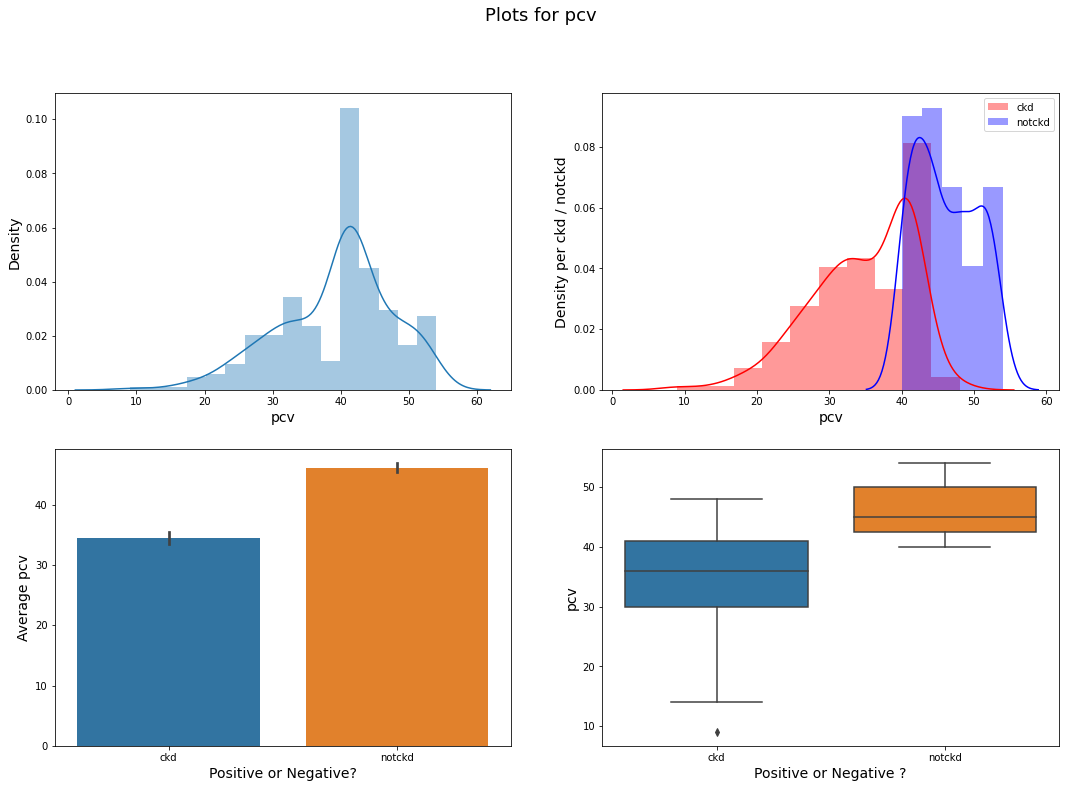

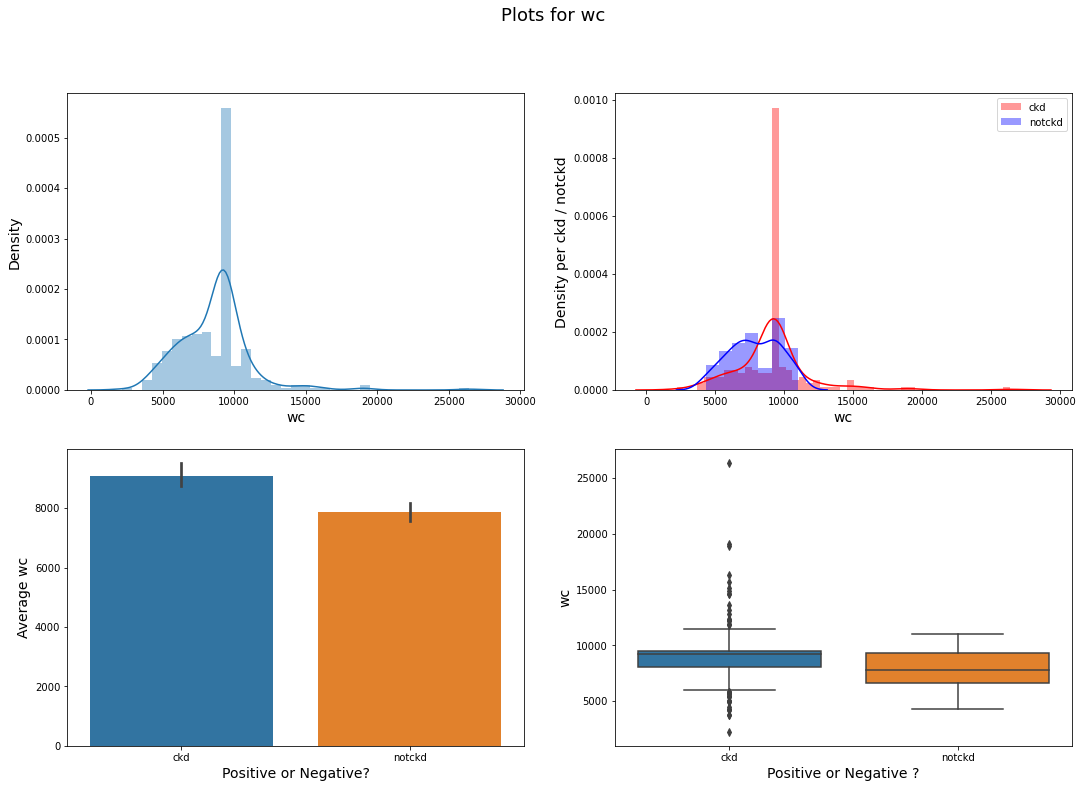

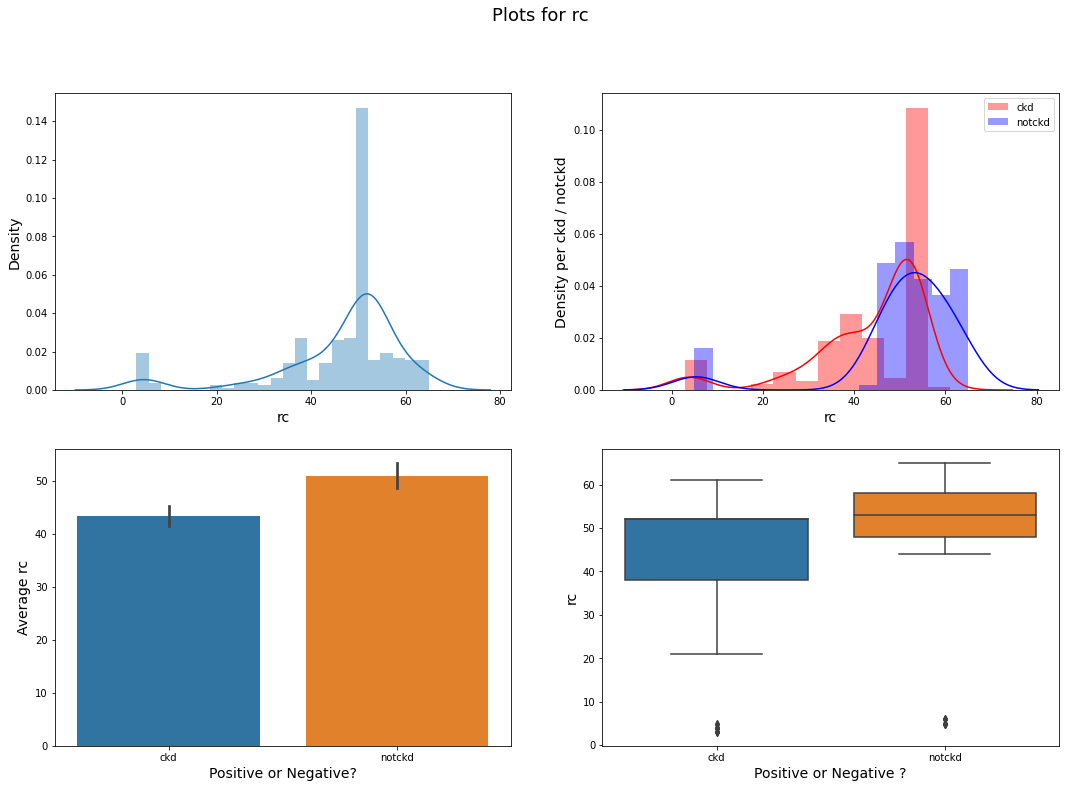

In [53]:
### Plotting Numeric Features
plot_numeric(train_data, numerical_features, 'classification')

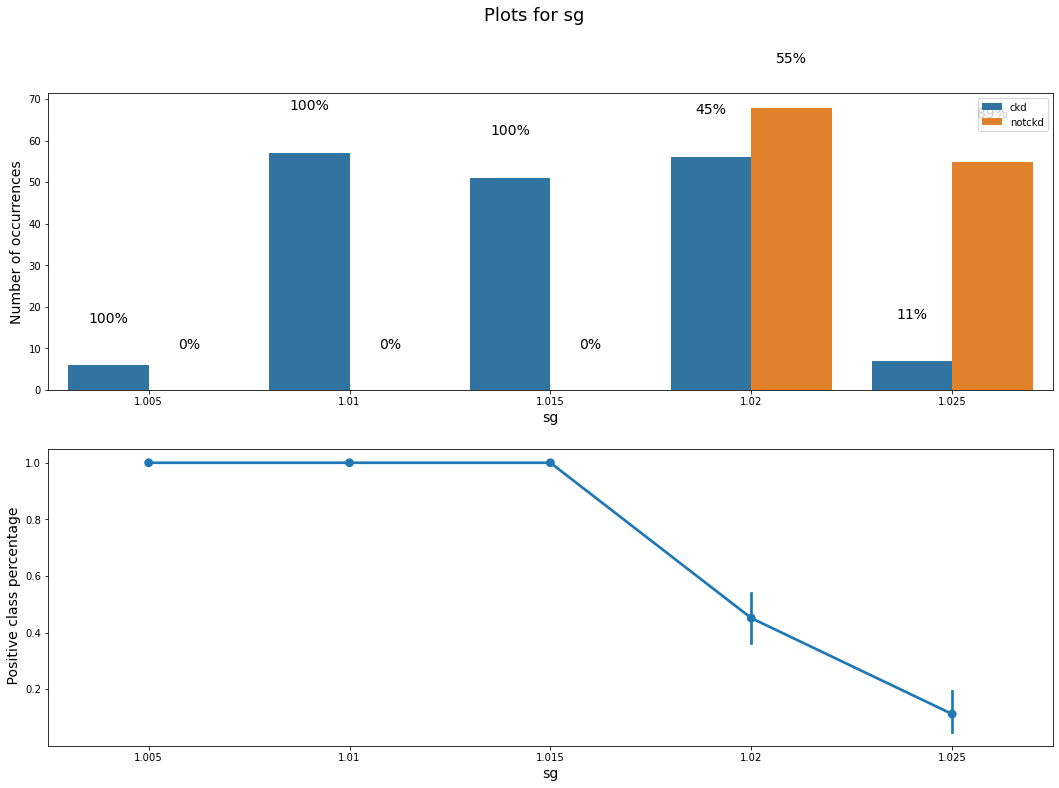

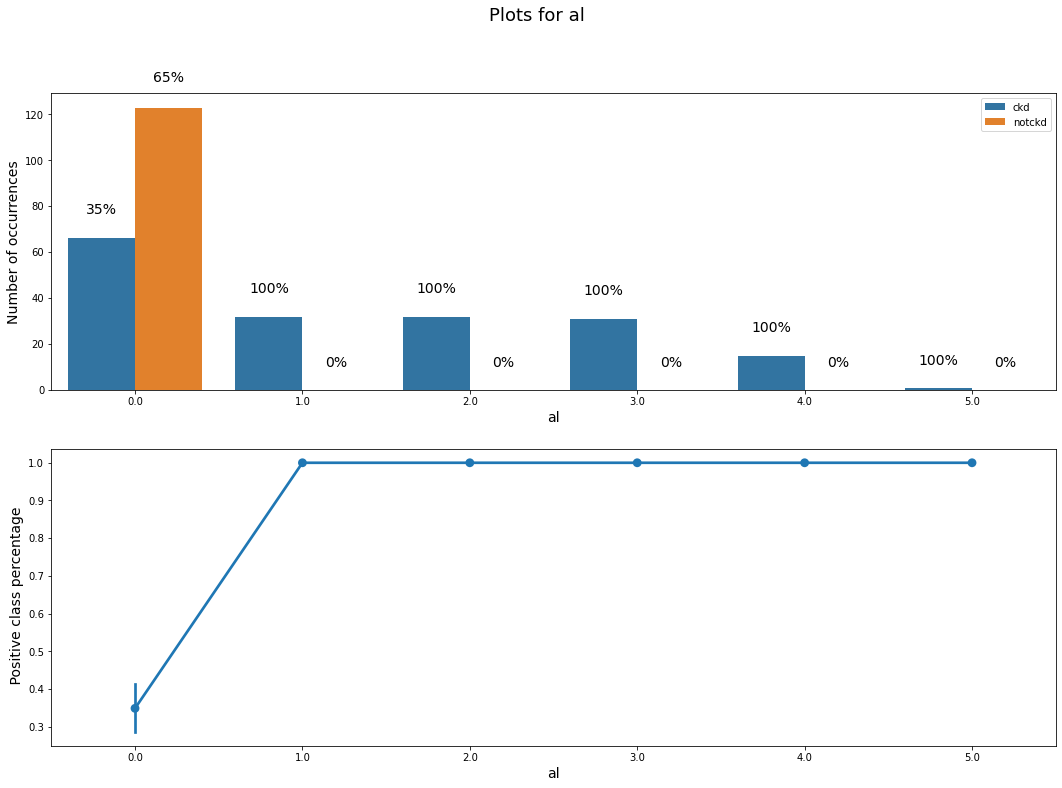

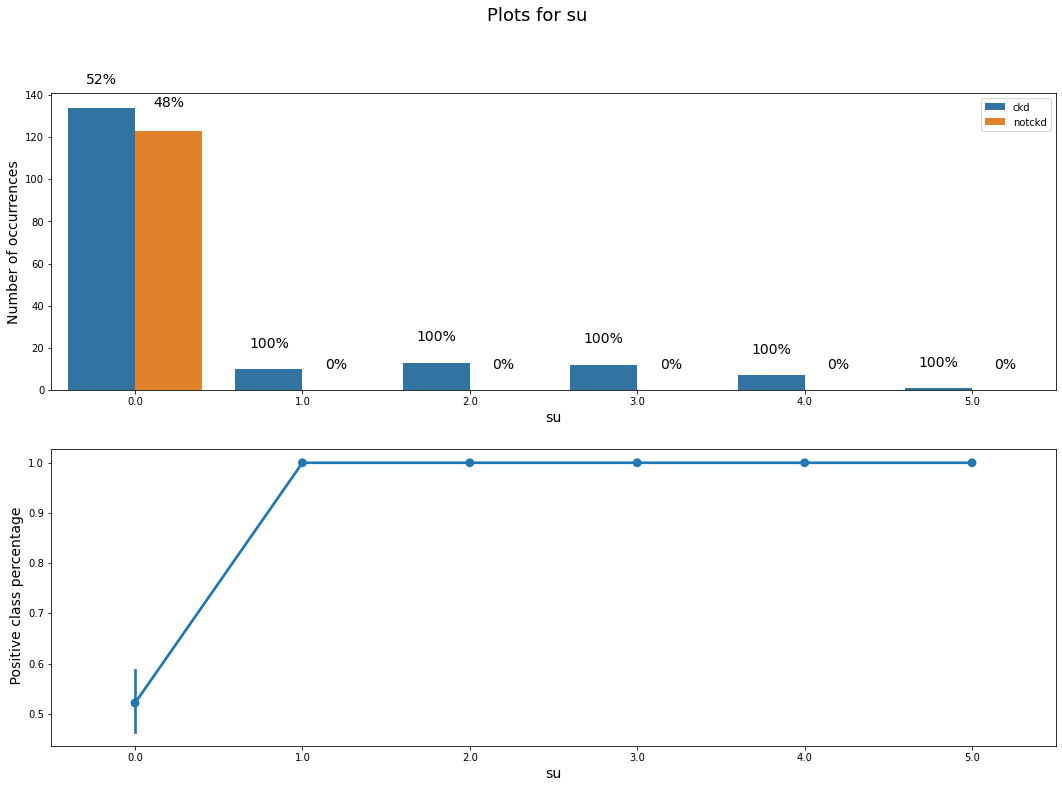

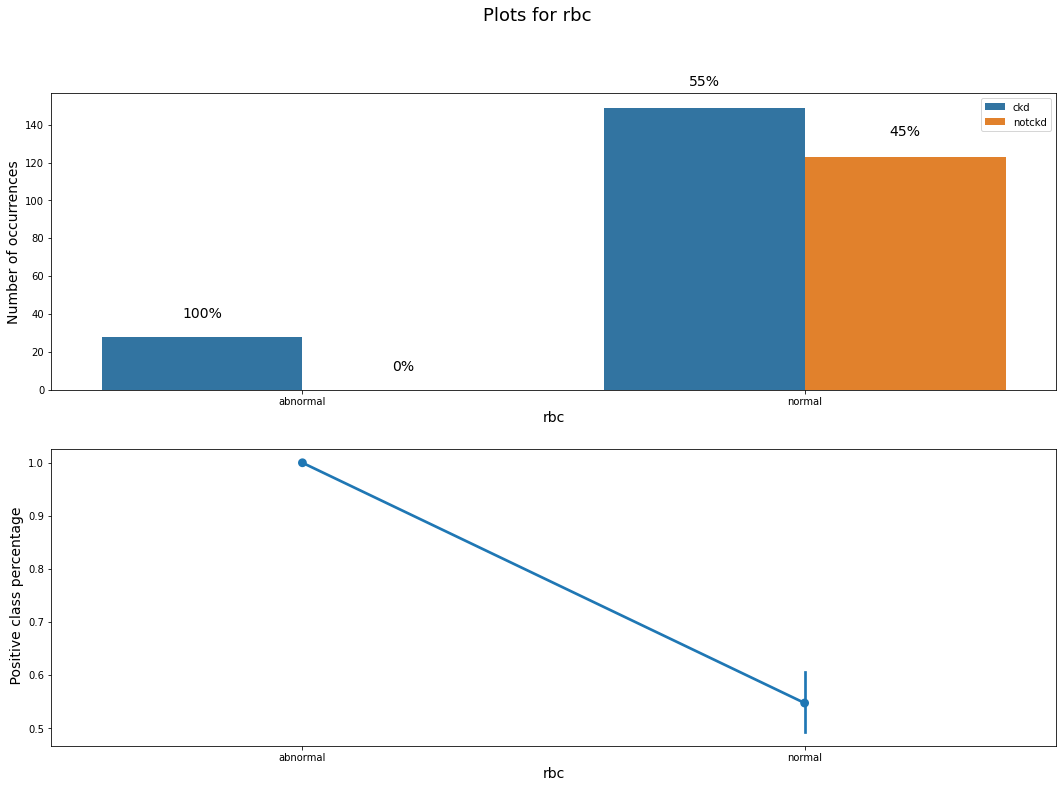

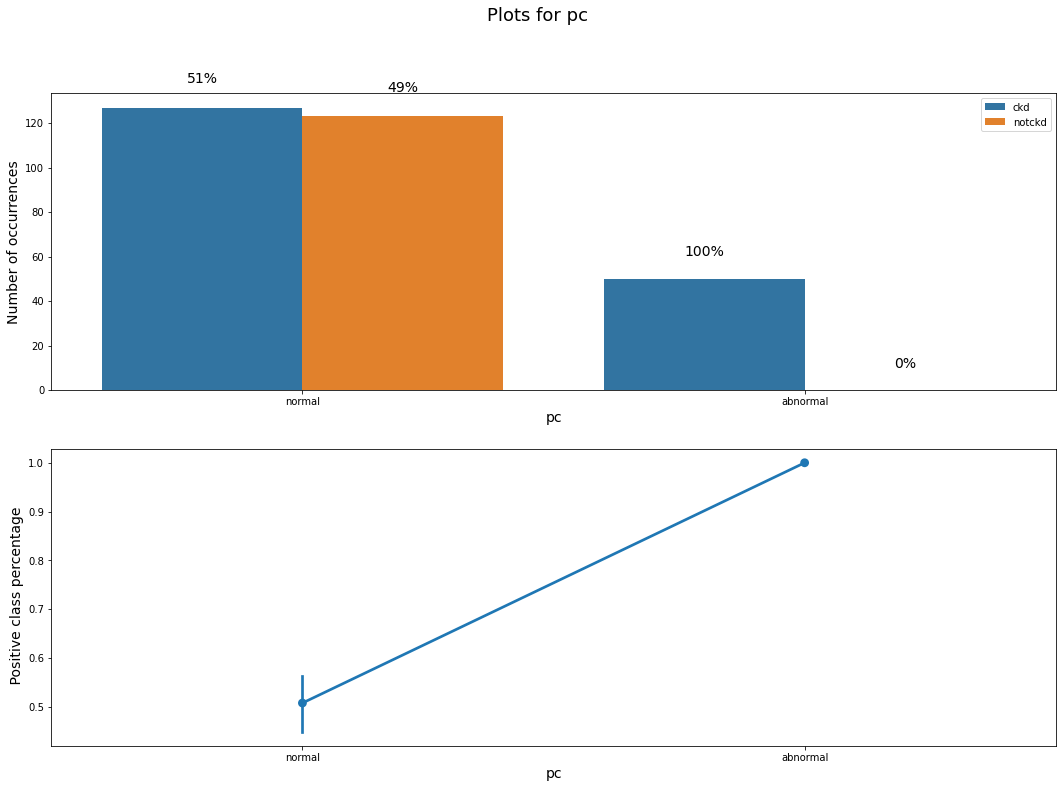

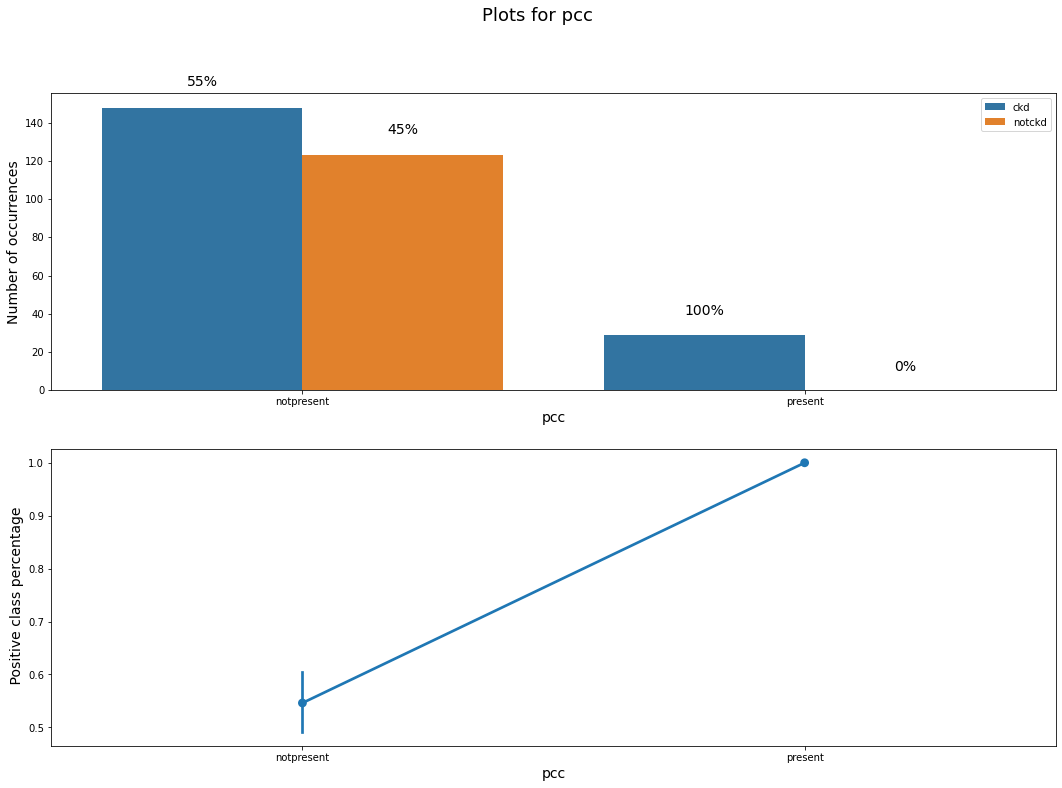

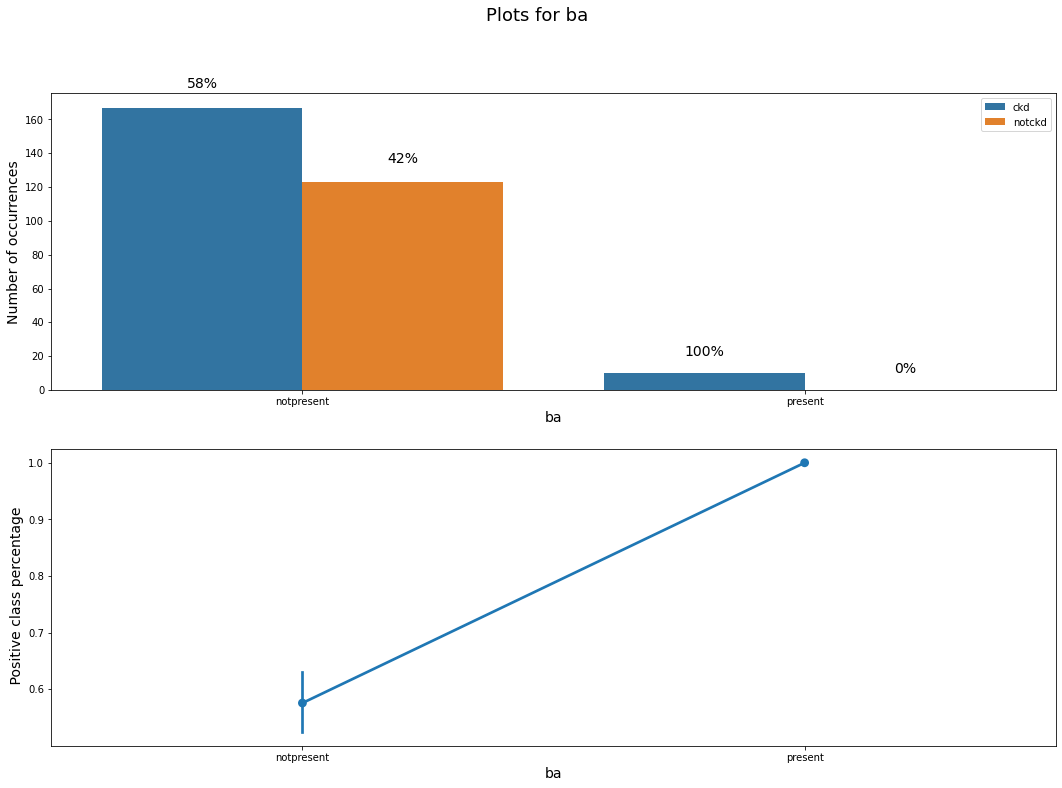

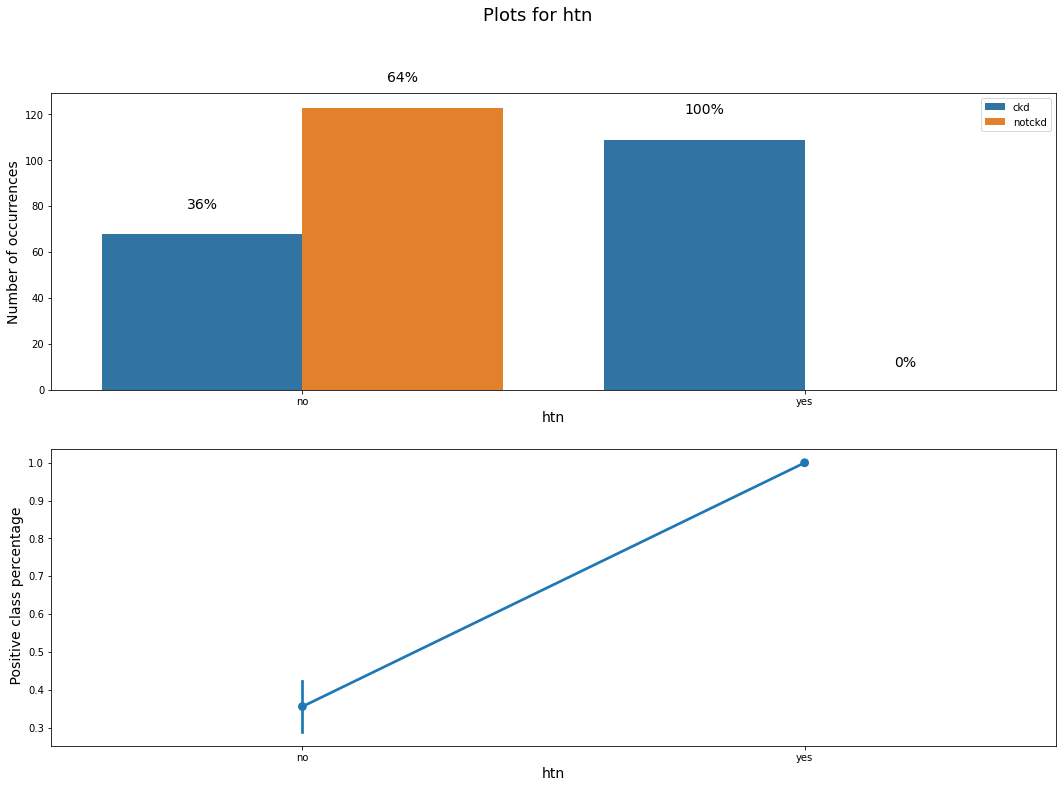

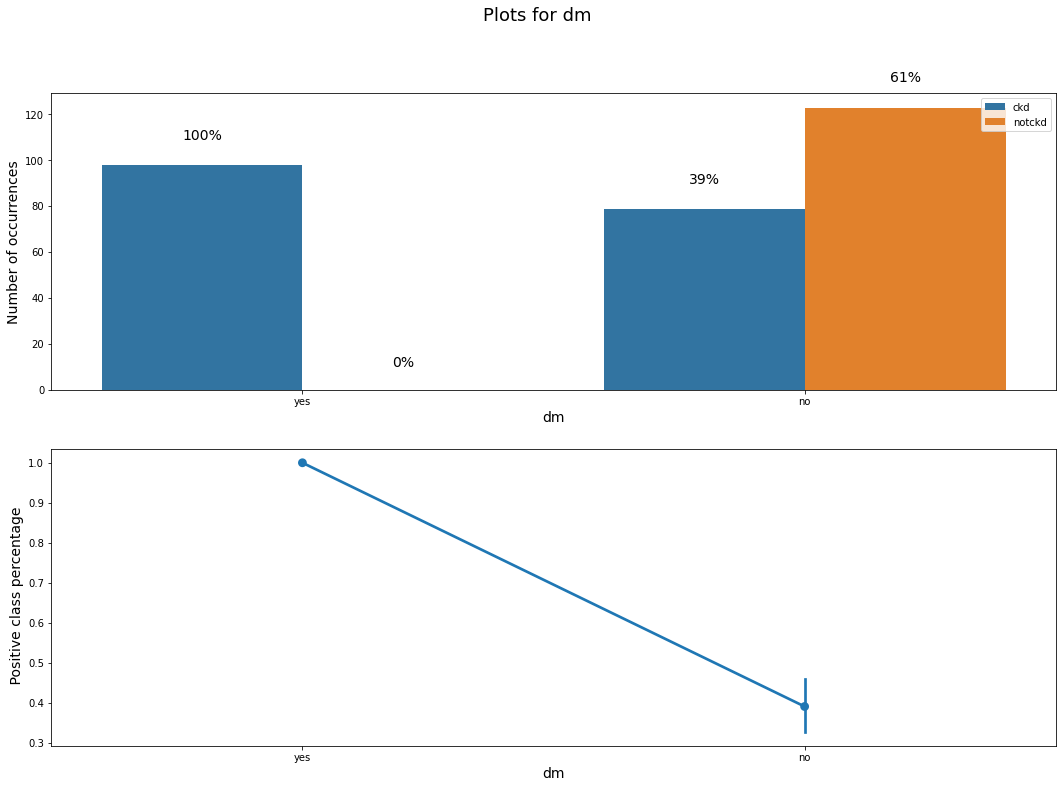

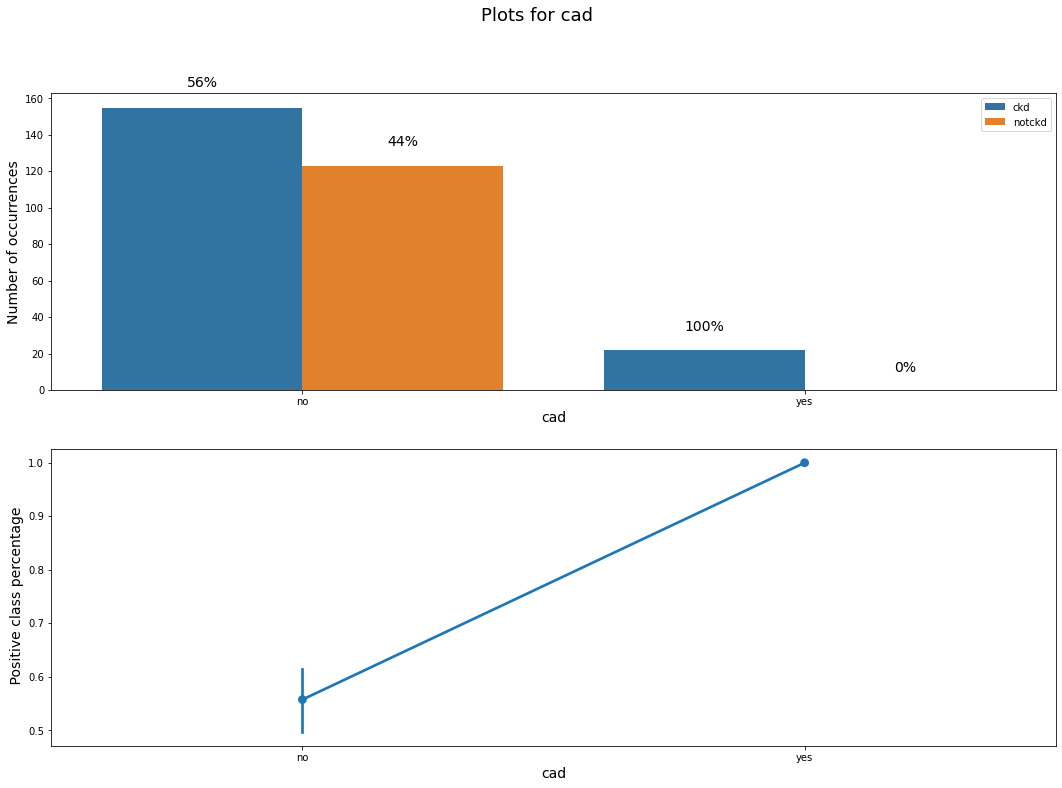

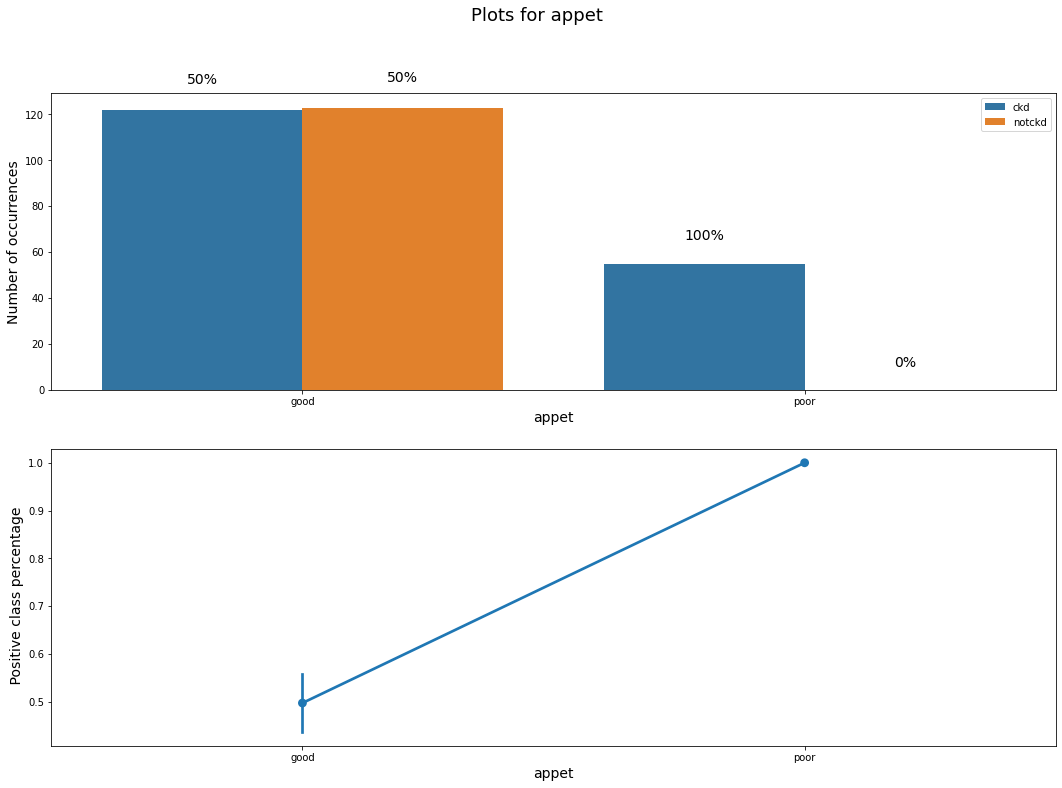

In [54]:
plot_categ(train_data,"classification", categorical_features[:-2],positive='ckd')

- Induviduals having some features (eg "su" > 0, "ane"=yes, etc) are necessarly healthy (notckd) .

In [55]:
def correlationMap(df, target) :
    """ 
    Correlation Heatmap
    Inputs : 
        df -- dataframe containing features to plot
        target -- target column name
     """
    classes = df[target].unique()
    if data[target].dtype == 'O' :
        df[target+'_id'] = (df[target]== classes[0]).astype(int) #encode string target 
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(12, 9))
    sns.heatmap(corr, vmax=.8,annot=True, square=True)
    if data[target].dtype == 'O' :
        df.drop([target+'_id'], axis=1, inplace=True)
    # fix for matplotlib bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # Gets the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

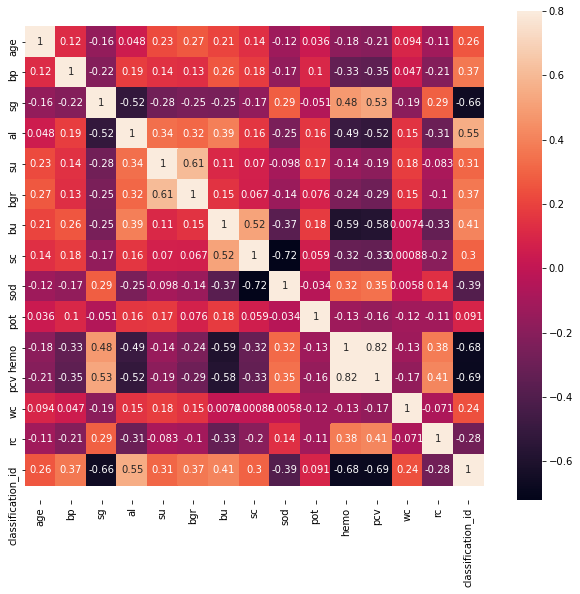

In [56]:
correlationMap(train_data,'classification')

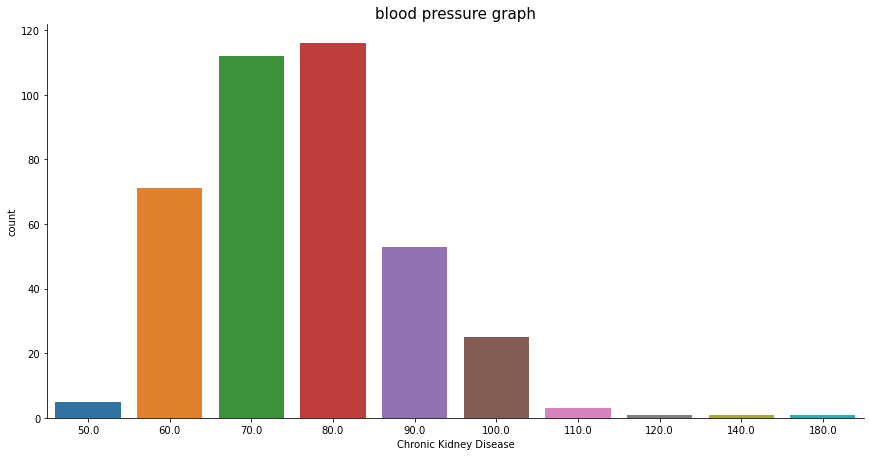

In [60]:
sns.factorplot(data=df, x='bp', kind= 'count',size=6,aspect=2)
plt.xlabel('Chronic Kidney Disease')
plt.title("blood pressure graph",fontsize=15)
plt.show()


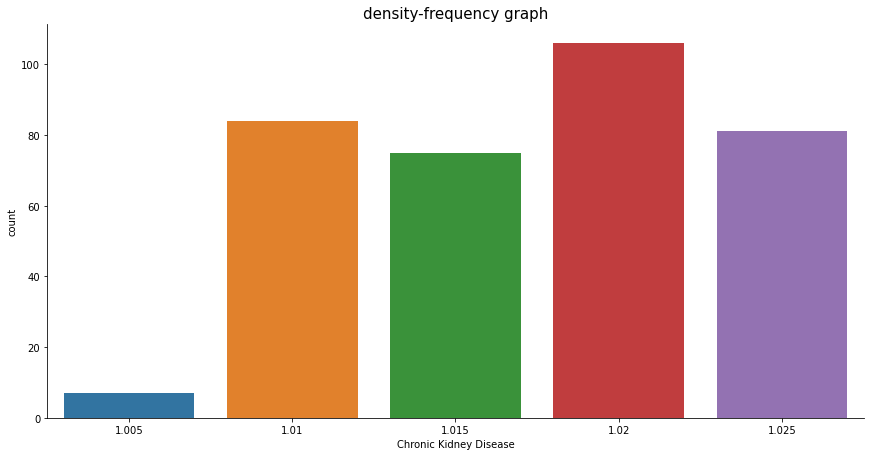

In [61]:
sns.factorplot(data=df, x='sg', kind= 'count',size=6,aspect=2)
plt.xlabel('Chronic Kidney Disease')
plt.title("density-frequency graph",fontsize=15)
plt.show()

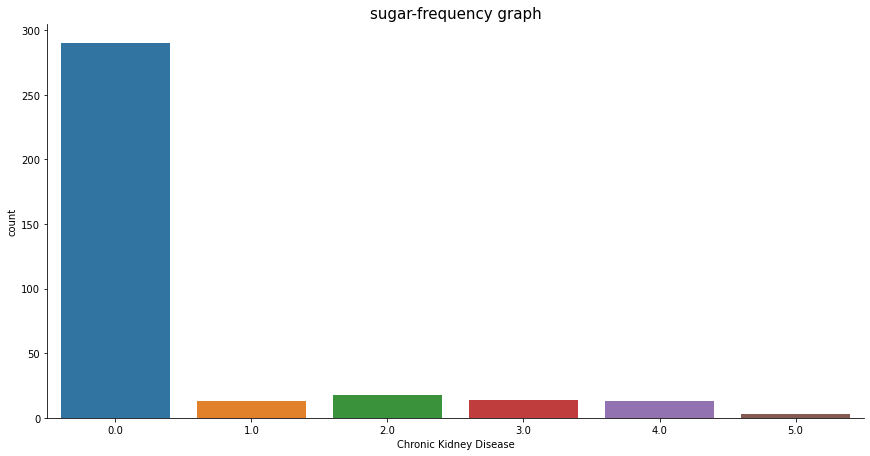

In [62]:
sns.factorplot(data=df, x='su', kind= 'count',size=6,aspect=2)
plt.xlabel('Chronic Kidney Disease')
plt.title("sugar-frequency graph",fontsize=15)
plt.show()

In [63]:
df.age.value_counts().sort_values()

79.0     1
82.0     1
7.0      1
2.0      1
78.0     1
        ..
55.0    12
50.0    12
48.0    12
65.0    17
60.0    19
Name: age, Length: 76, dtype: int64

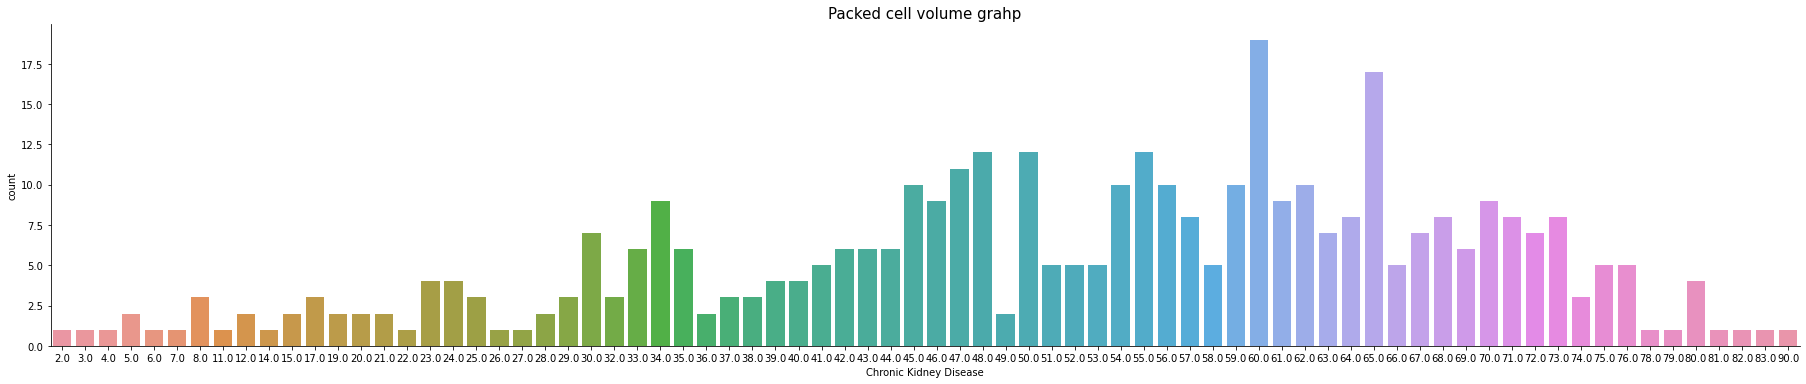

In [65]:
sns.factorplot(data=df, x='age', kind= 'count',aspect=5)
plt.xlabel('Chronic Kidney Disease')
plt.title("Packed cell volume grahp",fontsize=15)
plt.show()

In [ ]:
sns.pairplot(data)